<a href="https://colab.research.google.com/github/MauroGianchino/Data_Science_I-CoderHouse/blob/main/ProyectoDS_ParteII_Gianchino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segunda entrega - Trabajo Final
En este **Notebook** se realiza la segunda entrega del proyecto final del curso **Data Science I** de **Coderhouse**.

Alumno: Mauro Ariel Gianchino

Curso: 61720

##Abstract

El dataset **Australian_Vehicle_Prices** proporciona información detallada sobre los precios de una gran variedad de vehiculos que fueron vendidos en Australia. Presenta datos de más de 16.000 ventas de autos, incluido el año, el modelo, el color, consumo, estado, entre muchas otras. El precio de los vehículos se ve reflejado en dólares australianos.

El objetivo consiste en analizar las características ya mencionadas para entender como influye cada uno de estos en el precio del vehículo y como se relacionan entre sí. Para esto, se plantean distintas hipótesis y se realizan gráficos que permitan obtener conclusiones y corroborar si se cumplen o no las determinadas hipótesis.

Además, resulta interesante tener una idea como es la evolución de los precios a lo largo de los años y analizar como impactan factores económicos como la inflación o la demanda de automotores en el mercado.

En un futuro análisis, con todos estos datos es posible desarrollar un modelo de machine learning que permite estimar el precio de un vehiculo australiano que un individuo desee comprar o vender.

Finalmente, se implementan modelos de Machine Learning que permiten estimar el precio de los vehículos en función del kilometraje y también conocer el tipo de transmisión que pueden tener los autos en base a distintas características. Estos modelos son corroborados a partir de distintas métricas, que nos indicarán si es indicado o no.


##Hipótesis

1.  Los autos que más se venden en Australia son de tipo 4x4 ya que el país posee gran cantidad de superficie como territorio rural.

2. ¿Cómo influye el kilometraje y el año en el precio de un auto? ¿Es menor el precio a medida que tiene mayor kilometraje?

3. ¿Cuál tipo de transmisión consume más combustible? ¿Manual o automático?

4. ¿Qué tipo de combustible predomina en la venta de vehículos? ¿Como se relaciona con el precio?



##Análisis de datos

Lo siguiente será realizar un análisis de los datos para identificar posibles valores nulos, errores y los tipos de datos levantados del archivo CSV.

In [1]:
#importo librerias que voy a usar
from google.colab import drive
drive.mount('/content/drive')
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np

Mounted at /content/drive


In [2]:
df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Australian_Vehicle_Prices.csv") #cargo el archivo csv
df.head() #muestro las primeras 5 filas

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [3]:
df.shape #veo la cantidad de filas y columnas. El tamaño del data frame.

(16734, 19)

El dataset original posee 16734 filas y 19 columnas. Las columnas son:\
**Brand**: Nombre del fabricante del vehiculo\
**Year**: Año de manufactura o lanzamiento\
**Model**: Nombre del modelo del vehiculo\
**Car/Suv**: Tipo de vehiculo (auto o SUV)\
**Title**: Titulo o descripcion del vehiculo\
**UsedOrNew**: Estado del vehiculo (usado o nuevo)\
**Transmission**: Tipo de transmisión (manual o automático)\
**Engine**: Potencia o capacidad de motor (en litros o kW)\
**DriveType**: Tipo de tracción (front-wheel (ruedas delanteras), rear-wheel (ruedas traseras), or all-wheel (todas las ruedas))\
**FuelType**: Tipo de combustible\
**FuelConsumption**: Ratio de consumo de combustible (en litros por 100km)\
**Kilometres**: Kilometraje (en km)\
**ColourExtInt**: Color del auto (externo e interno)\
**Location**: Ubicación  (ciudad y Estado)\
**CylindersinEngine**: Cantidad de cilindros\
**BodyType**: Estilo (sedan, hatchback, coupe, etc.)\
**Doors**: Cantidad de puertas\
**Seats**: Cantidad de asientos\
**Price**: Precio (en dólares australianos)

In [4]:
df.dtypes #veo los tipos de variables de cada columna

,0
Brand,object
Year,float64
Model,object
Car/Suv,object
Title,object
UsedOrNew,object
Transmission,object
Engine,object
DriveType,object
FuelType,object


In [5]:
df.info() #veo la información resumida de todas las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

Si bien el dataset posee 16734 filas, veo que en info() se me indica que hay 16733. Puede suceder que una fila esté completamente vacía. Debo hallar esa fila y analizar si la remuevo. Voy a hallar todos los NaN del dataset por cada columna


In [6]:
print("\nValores nulos en cada columna:")
df.isna().sum()


Valores nulos en cada columna:


,0
Brand,1
Year,1
Model,1
Car/Suv,28
Title,1
UsedOrNew,1
Transmission,1
Engine,1
DriveType,1
FuelType,1


Efectivamente, hay una fila entera que tiene todos valores NaN.Voy a buscarla y eliminarla. Adicionalmente, observo que hay mucho valores tipo NaN en columna como asientos, puertas, entre otros. Primero eliminaré la fila NaN y luego determinaré que hacer con el resto de valores NaN dependiendo del análisis que necesite para corroborar las hipótesis.

In [7]:
df.loc[df.Year.isna() == True] #filtro para buscar en donde el año sea nulo para hallar la fila en cuestión

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
2391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Es la fila con indice 2391.

In [8]:
df = df.drop(index=2391) #elimino la fila

In [9]:
df.shape

(16733, 19)

In [10]:
df.loc[df.Year.isna() == True] #chequeo que no haya fila con nan en year

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price


Efectivamente, se borró la fila en cuestión.

Retomando los tipos de datos de las columnas, observo que la mayoria de los datos son tipo "Object", por lo que los númericos como el precio, asientos, etc deberé transformarlos. La columna de Year la pasaré a tipo entero. Por ende, debo cambiar el tipo de dato de aquellas columnas que sean números para realizar los posteriores gráficos y análisis.

In [11]:
df['FuelConsumption'] = df['FuelConsumption'].str.replace(' L / 100 km', '')
df['FuelConsumption'] = df['FuelConsumption'].str.replace('-', '', regex=False)
df['FuelConsumption'] = pd.to_numeric(df['FuelConsumption'], errors='coerce') #paso de Nan string a tipo numérico
df['Kilometres'] = df['Kilometres'].str.replace('-', '', regex=False)
df['Kilometres'] = pd.to_numeric(df['Kilometres'], errors='coerce') #paso de Nan string a tipo numérico
df['Transmission'] = df['Transmission'].str.replace('-', '', regex=False)
df['Doors'] = df['Doors'].str.replace('-', '', regex=False)
df['Doors'] = df['Doors'].str.replace('Doors', '', regex=False)
df['Doors'] = pd.to_numeric(df['Doors'], errors='coerce') #paso de Nan string a tipo numérico
df['Seats'] = df['Seats'].str.replace('-', '', regex=False)
df['Seats'] = df['Seats'].str.replace('Seats', '', regex=False)
df['Seats'] = pd.to_numeric(df['Seats'], errors='coerce') #paso de Nan string a tipo numérico
df['Price'] = df['Price'].str.replace('-', '', regex=False)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') #paso de Nan string a tipo numérico
#ahora los paso a float los númericos de interés
df['Year'] = df.Year.astype(int)
df.FuelConsumption.astype(float)
df.Kilometres.astype(float)
df.Doors.astype(float)
df.Seats.astype(float)
df.Price.astype(float)


,Price
0,51990.0
1,19990.0
2,108988.0
3,32990.0
4,34990.0
...,...
16729,29500.0
16730,39888.0
16731,35280.0
16732,41888.0


Observo que los tipos de dato cambiaron.

In [12]:
df

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4.0,7.0,51990.0
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5.0,5.0,19990.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2.0,4.0,108988.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11.0,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2.0,4.0,32990.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6.0,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4.0,5.0,34990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,Toyota,2014,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,NaN,66000.0,Grey / -,"Rocklea, QLD",-,Commercial,NaN,NaN,29500.0
16730,Mercedes-Benz,2012,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,NaN,117432.0,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888.0
16731,Suzuki,2022,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2,5165.0,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4.0,5.0,35280.0
16732,Mercedes-Benz,2016,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2,85525.0,Grey / Black,"Albion, QLD",4 cyl,SUV,4.0,5.0,41888.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16733 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  int64  
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    15036 non-null  float64
 11  Kilometres         16142 non-null  float64
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              15059 no

Hago un describe() para tener una idea de algunas parámetros de los datos.

In [14]:
df.describe().round(1)

,Year,FuelConsumption,Kilometres,Doors,Seats,Price
count,16733.0,15036.0,16142.0,15059.0,15029.0,16681.0
mean,2016.2,7.7,100096.1,4.0,5.1,37303.3
std,5.2,2.3,78213.1,0.7,1.1,37177.9
min,1940.0,0.0,1.0,2.0,2.0,88.0
25%,2013.0,6.5,40757.0,4.0,5.0,18999.0
50%,2017.0,7.6,85951.5,4.0,5.0,29500.0
75%,2020.0,8.8,146544.5,4.0,5.0,43990.0
max,2023.0,27.0,533849.0,5.0,22.0,1500000.0


Llama la atención que el mínimo precio de un vehículo sea 88 dólares australianos. Puede tratarse de un valor outlier.Asimismo, el máximo sea 1.500.000 dólares, pero puede tratarse de un auto de lujo muy particular. Esto analizará mas adelante.

Reviso los datos nulos y como los voy a tratar.

In [15]:
df.isna().sum()

,0
Brand,0
Year,0
Model,0
Car/Suv,27
Title,0
UsedOrNew,0
Transmission,0
Engine,0
DriveType,0
FuelType,0


Lo más relevante para el análisis que haré son los nulos en FuelConsumption, Kilometres y Price. Suponiendo el peor caso, en que todos esos nulos ocurren en filas diferentes, si las elimino quitaría alrededor del 14% del dataset. Considerando que tengo alrededor de 16700 datos y asumo que es una gran cantidad para la envergadura de este trabajo, voy a eliminar esas filas.

In [16]:
df = df.dropna(subset=['FuelConsumption', 'Kilometres','Price'])
df.isna().sum()

,0
Brand,0
Year,0
Model,0
Car/Suv,0
Title,0
UsedOrNew,0
Transmission,0
Engine,0
DriveType,0
FuelType,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14454 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14454 non-null  object 
 1   Year               14454 non-null  int64  
 2   Model              14454 non-null  object 
 3   Car/Suv            14454 non-null  object 
 4   Title              14454 non-null  object 
 5   UsedOrNew          14454 non-null  object 
 6   Transmission       14454 non-null  object 
 7   Engine             14454 non-null  object 
 8   DriveType          14454 non-null  object 
 9   FuelType           14454 non-null  object 
 10  FuelConsumption    14454 non-null  float64
 11  Kilometres         14454 non-null  float64
 12  ColourExtInt       14454 non-null  object 
 13  Location           14454 non-null  object 
 14  CylindersinEngine  14454 non-null  object 
 15  BodyType           14454 non-null  object 
 16  Doors              14454 no

No quedaron filas con valores nulos y finalmente el dataset quedó con 14454 filas, reduciendose en un 13,6%.



##Outliers

Habiendo eliminado varios filas por sus valores nulos en algunas columnas, voy a chequear nuevamente con un *describe* la información general de mi dataset.


In [18]:
df.describe().round(1)

,Year,FuelConsumption,Kilometres,Doors,Seats,Price
count,14454.0,14454.0,14454.0,14454.0,14454.0,14454.0
mean,2016.2,7.7,100096.7,4.0,5.1,34892.5
std,4.9,2.2,78140.4,0.7,1.1,29051.9
min,1978.0,0.0,1.0,2.0,2.0,88.0
25%,2013.0,6.6,41074.0,4.0,5.0,18990.0
50%,2017.0,7.6,85052.0,4.0,5.0,28990.0
75%,2020.0,8.8,146705.5,4.0,5.0,42288.0
max,2023.0,27.0,526162.0,5.0,22.0,649880.0


Veo que el auto de valor 1.500.000 dólares ya no pertenece al dataset. Voy a graficar el precio de los autos en función al kilometraje para identificar posibles outliers.

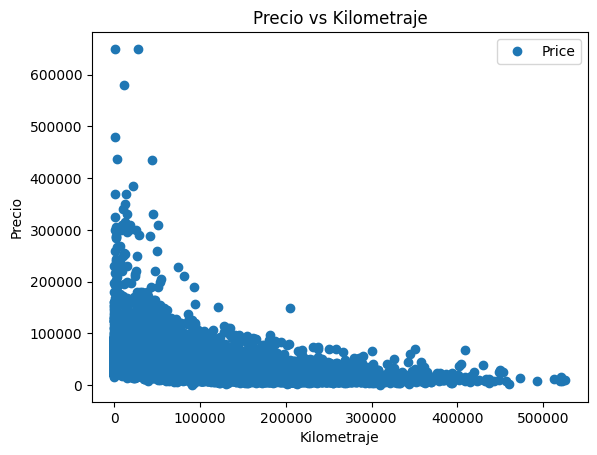

In [19]:
df.plot(x='Kilometres', y='Price', style="o")
plt.title('Precio vs Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

Observo que existe una gran variedad de precios de vehículos, pero haré mayor énfasis en lo que superen los 400.000 dólares, ya que son pocas muestras y debo considerar si son valores que tengan sentido. En primer lugar, eliminaré la muestra correspondiente al valor de 88 dólares de un auto, ya que carece de sentido

In [20]:
df = df[df['Price'] != 88]
df.describe().round(1)

,Year,FuelConsumption,Kilometres,Doors,Seats,Price
count,14453.0,14453.0,14453.0,14453.0,14453.0,14453.0
mean,2016.2,7.7,100097.4,4.0,5.1,34894.9
std,4.9,2.2,78143.0,0.7,1.1,29051.5
min,1978.0,0.0,1.0,2.0,2.0,900.0
25%,2013.0,6.6,41067.0,4.0,5.0,18990.0
50%,2017.0,7.6,85039.0,4.0,5.0,28990.0
75%,2020.0,8.8,146720.0,4.0,5.0,42288.0
max,2023.0,27.0,526162.0,5.0,22.0,649880.0


Extraigo los vehículos con precio mayor a 400.000

In [21]:
df_expensive = df[df['Price'] > 400000]
df_expensive


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
3036,Lamborghini,2019,Urus,SUV,2019 Lamborghini Urus 4 Seat,USED,Automatic,"8 cyl, 4 L",AWD,Premium,12.7,44329.0,Grey / Brown,"Glebe, NSW",8 cyl,SUV,4.0,4.0,435000.0
3357,McLaren,2019,720S,Convertible,2019 McLaren 720S Spider Luxury,USED,Automatic,"8 cyl, 4 L",Rear,Premium,11.0,138.0,White / -,"Rushcutters Bay, NSW",8 cyl,Convertible,2.0,2.0,649880.0
4046,Mercedes-Benz,2023,G63,Sydney Luxury Motors,2023 Mercedes-Benz G63,USED,,"8 cyl, 4 L",AWD,Premium,13.1,100.0,White / Red,"Mascot, NSW",8 cyl,SUV,4.0,5.0,478888.0
5271,Ferrari,2019,GTC4,Coupe,2019 Ferrari GTC4 Lusso (awd),USED,Automatic,"12 cyl, 6.3 L",AWD,Premium,15.3,11480.0,Blue / Black,"Auburn, NSW",12 cyl,Coupe,2.0,4.0,579888.0
10358,Lamborghini,2012,Aventador,Coupe,2012 Lamborghini Aventador,USED,Automatic,"12 cyl, 6.5 L",AWD,Premium,17.2,27843.0,White / -,"Port Melbourne, VIC",12 cyl,Coupe,2.0,2.0,649880.0
16006,Audi,2020,R8,Coupe,2020 Audi R8 V10 Performance Quattro,USED,Automatic,"10 cyl, 5.2 L",AWD,Premium,13.4,2420.0,Grey / Black,"Wollongong, NSW",10 cyl,Coupe,2.0,2.0,436900.0


Vemos que se tratan de autos de alta gama, de marcas como Ferrari o McLaren, por lo que su precio tiene sentido. Por ende, no los eliminaré del dataset.

Ya habiendo limpiado y seteado todos los tipos de datos del dataset, y además, haber analizado los outliers más relevantes, se sigue con el análisis de los datos y corroboración de las hipótesis.


#Hipotesis

##Hipótesis 1

1.  Los autos que más se venden en Australia son de tipo 4x4 ya que el país posee gran cantidad de superficie como territorio rural.



Busco la cardinalidad de DriveType

In [22]:
Tipos_de_datos = df.DriveType.unique()
Cantidad_de_datos = len(Tipos_de_datos)
print(Tipos_de_datos)
print(Cantidad_de_datos)

['AWD' 'Front' 'Rear' '4WD' 'Other']
5


Existen 5 tipos de DriveType. Voy a agrupar la cantidad de cada uno en una lista.

In [23]:
quant =[]
quant.append(len(df[df.DriveType == "AWD"]))
quant.append(len(df[df.DriveType == "Front"]))
quant.append(len(df[df.DriveType == "Rear"]))
quant.append(len(df[df.DriveType == "4WD"]))
quant.append(len(df[df.DriveType == "Other"]))
quant

[2933, 6470, 1981, 3067, 2]

In [24]:
for i in Tipos_de_datos:
     print(i)


AWD
Front
Rear
4WD
Other


Hago un grafico de Torta (Pie chart)

([<matplotlib.patches.Wedge at 0x786dffe9e980>,
 [Text(-0.4583166004885391, 0.6187454191479956, 'AWD'),
  Text(-0.34195325236623597, -0.6899043217694417, 'Front'),
  Text(0.7555556287032674, -0.1484442384695692, 'Rear'),
  Text(0.4766678726524113, 0.6047212078148282, '4WD'),
  Text(0.0003782580974227587, 0.8699999177705777, 'Other')],
 [Text(-0.24999087299374861, 0.33749750135345213, '20.29%'),
  Text(-0.1865199558361287, -0.37631144823787727, '44.77%'),
  Text(0.412121252019964, -0.080969584619765, '13.71%'),
  Text(0.26000065781040615, 0.32984793153536085, '21.22%'),
  Text(0.00022608529960900517, 0.5199999508513797, '0.01%')])

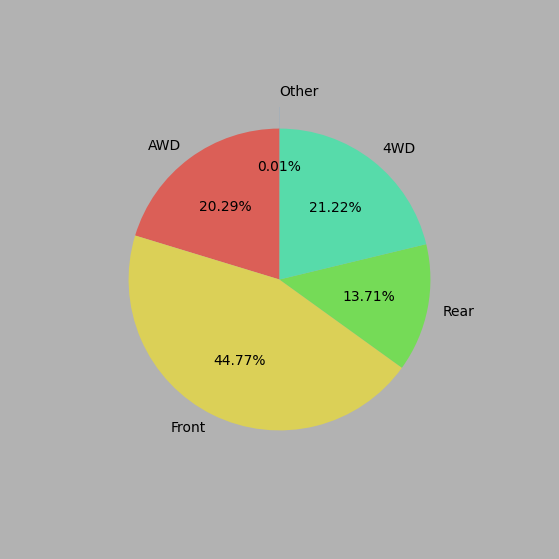

In [25]:
fig,ax = plt.subplots(figsize =(8,7))
fig.set_facecolor('#b2b2b2')
ax.pie(quant,labels=Tipos_de_datos ,radius=0.7, startangle=90, explode= (0,0,0,0,0.1), autopct= "%1.2f%%", colors=sns.color_palette("hls",7))

Hay mucha mayor cantidad de ventas de autos de traccion a dos ruedas delanteras.

##Hipótesis 2

2. ¿Cómo influye el kilometraje y el año en el precio de un auto? ¿Es menor el precio a medida que tiene mayor kilometraje?


En base al histograma, podemos afirmar que existen más publicaciones de vehículos cuanto menos kilometraje tengan.

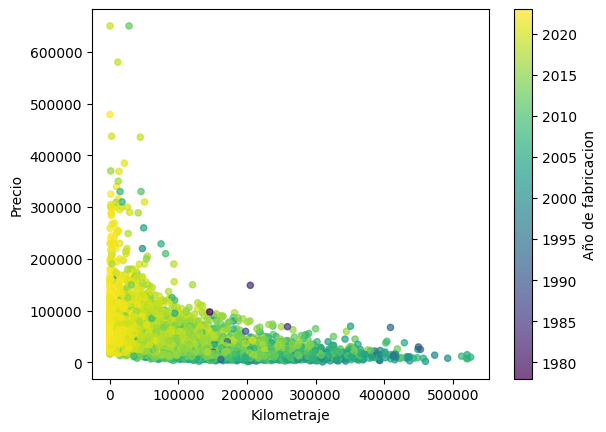

In [26]:
# Datos de ejemplo
x = df.Year  # Primera variable
y = df.Kilometres  # Segunda variable
z = df.Price  # Tercera variable

plt.scatter(y, z, s=[p/100 for p in x], c=x, cmap='viridis', alpha=0.7)

plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.colorbar(label='Año de fabricacion')

plt.show()

A partir del anterior gráfico, se observa que los vehículos mas nuevos suelen ser los de menor kilometraje y que existen otros con mucho mayor kilometraje que se venden a precios similares (siendo más antiguos).

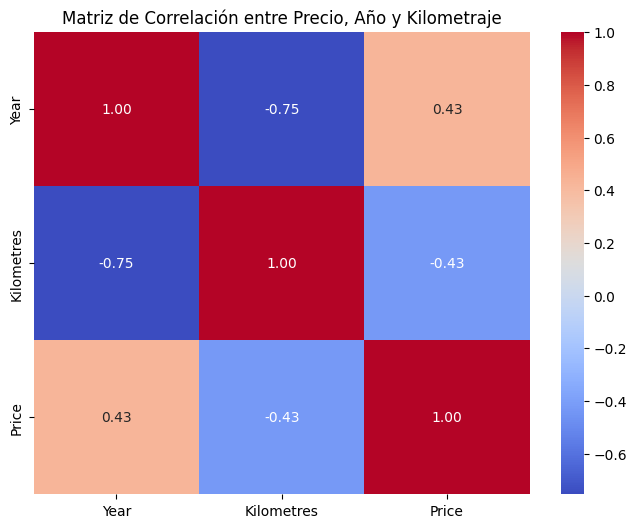

In [27]:
tf = df[['Year','Kilometres','Price']]
correlacion = tf.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Precio, Año y Kilometraje')
plt.show()

A partir de la matriz, podemos ver que en la fila inferior (de precio) el año y el kilometraje afectan de manera idéntica en magnitud al precio, pero en sentidos opuestos. Esto indica que a medida que el año del vehículo aumenta (es más nuevo) el precio es mayor. Por el lado del kilometraje, a mayor kilometraje el precio disminuye, lo cual es congruente ya que indica que el auto fue más usado y por ende su precio debería decrecer.

##Hipótesis 3


3. ¿Cuál tipo de transmisión consume más combustible? ¿Manual o automático?



Para analizar esta hipótesis, primero se adquieren los data frames de cada tipo de transmisión.

In [28]:
valores_unicos = df['Transmission'].value_counts()
valores_unicos

,count
Transmission,
Automatic,12730
Manual,1693
,30


Veo que hay 30 muestras que no indica el tipo de transmisión, por lo que procederé a eliminarlas para evitar desvíos en el futuro.

In [29]:
df = df[df['Transmission'] != '']
df.shape

(14423, 19)

Paso a separar el dataset según el tipo de tranmisión.

In [30]:
t_manual = df[df.Transmission == "Manual"]
t_automatico = df[df.Transmission == "Automatic"]
t_manual.describe().round(1)

,Year,FuelConsumption,Kilometres,Doors,Seats,Price
count,1693.0,1693.0,1693.0,1693.0,1693.0,1693.0
mean,2012.8,8.0,152199.3,3.7,4.5,26314.4
std,5.3,2.7,91177.1,1.0,1.2,24785.4
min,1978.0,0.0,4.0,2.0,2.0,900.0
25%,2010.0,6.7,86852.0,3.0,4.0,11995.0
50%,2013.0,8.0,144171.0,4.0,5.0,18900.0
75%,2016.0,9.3,209628.0,4.0,5.0,31990.0
max,2023.0,20.0,526162.0,5.0,14.0,309911.0


In [31]:
t_automatico.describe().round(1)

,Year,FuelConsumption,Kilometres,Doors,Seats,Price
count,12730.0,12730.0,12730.0,12730.0,12730.0,12730.0
mean,2016.6,7.7,93382.0,4.1,5.2,35893.9
std,4.7,2.1,73497.7,0.6,1.0,28933.1
min,1985.0,0.0,1.0,2.0,2.0,1200.0
25%,2014.0,6.6,37634.0,4.0,5.0,19990.0
50%,2018.0,7.5,79081.0,4.0,5.0,29980.0
75%,2020.0,8.7,136324.0,4.0,5.0,43490.0
max,2023.0,27.0,521771.0,5.0,22.0,649880.0


A partir del .describe observo que hay autos con consumo de 0 L / 100km, y dado que eso carece de sentido, voy a eliminar aquellos datos que sean cero.

In [32]:
print("Cantidad de vehiculos manual que consumen cero: ")
print((t_manual['FuelConsumption']==0).sum())
print("Cantidad de vehiculos automaticos que consumen cero: ")
print((t_automatico['FuelConsumption']==0).sum())

Cantidad de vehiculos manual que consumen cero: 
73
Cantidad de vehiculos automaticos que consumen cero: 
162


In [33]:
t_manual = t_manual[t_manual['FuelConsumption'] != 0]
t_automatico = t_automatico[t_automatico['FuelConsumption'] != 0]
t_manual.describe().round(1)

,Year,FuelConsumption,Kilometres,Doors,Seats,Price
count,1620.0,1620.0,1620.0,1620.0,1620.0,1620.0
mean,2013.2,8.4,147089.7,3.7,4.5,26443.6
std,4.8,2.1,85966.9,1.0,1.1,24818.1
min,1990.0,3.7,4.0,2.0,2.0,900.0
25%,2010.0,6.9,85283.2,3.0,4.0,11999.0
50%,2013.0,8.1,142198.5,4.0,5.0,18989.0
75%,2016.0,9.4,202259.8,4.0,5.0,31990.0
max,2023.0,20.0,526162.0,5.0,14.0,309911.0


In [34]:
t_automatico.describe().round(1)


,Year,FuelConsumption,Kilometres,Doors,Seats,Price
count,12568.0,12568.0,12568.0,12568.0,12568.0,12568.0
mean,2016.7,7.8,93128.7,4.1,5.2,35565.8
std,4.6,2.0,72490.8,0.6,1.0,28161.9
min,1985.0,1.7,1.0,2.0,2.0,1200.0
25%,2014.0,6.6,38172.0,4.0,5.0,19990.0
50%,2018.0,7.6,79172.0,4.0,5.0,29912.5
75%,2020.0,8.7,135630.8,4.0,5.0,42990.0
max,2023.0,27.0,521771.0,5.0,14.0,649880.0


Ya eliminados esos registros, se pasa a graficar el consumo promedio según la transmisión en un gráfico de barras.

In [35]:
print(df.Transmission.unique())

['Automatic' 'Manual']


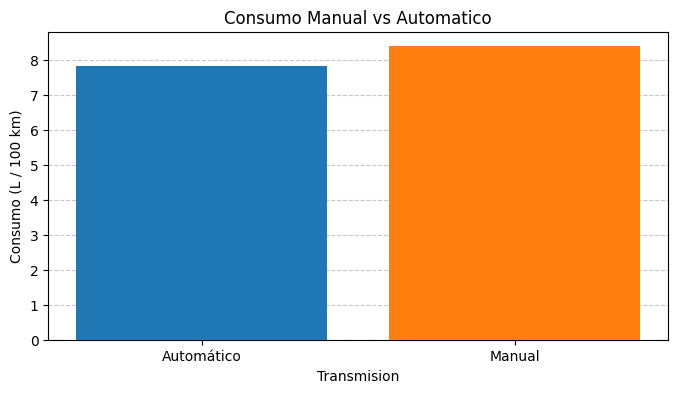

In [36]:
fig, ax = plt.subplots(figsize=(8,4))
plt.grid(True, axis='y', linestyle='--', alpha=0.7,zorder=0)
ax.bar(['Automático'],t_automatico.FuelConsumption.mean(), label='Automático',zorder=3)
ax.bar(['Manual'],t_manual.FuelConsumption.mean(), label='Manual',zorder=3)
ax.set_title('Consumo Manual vs Automatico')
ax.set_ylabel('Consumo (L / 100 km)')
ax.set_xlabel('Transmision')
plt.show()


A partir del gráfico de barras, podemos concluir que, si bien el consumo de la transmisión manual es más elevado (8.4 L/100 km) que el de la automática (7.8 L/100 km), la diferencia es menor al 10 %, por lo que los consumos son similares.

##Hipótesis 4

4. ¿Qué tipo de combustible predomina en la venta de vehículos? ¿Cómo se relaciona con el precio?

In [37]:
Tipos_de_combustibles = df.FuelType.unique()
Tipos_de_combustibles = Tipos_de_combustibles[Tipos_de_combustibles != '-']
#Tipos_de_combustibles= Tipos_de_combustibles[Tipos_de_combustibles['A'] != 30]
Tipos_de_combustibles

array(['Diesel', 'Premium', 'Unleaded', 'Hybrid', 'Electric', 'LPG',
       'Leaded'], dtype=object)

In [38]:
f_Diesel = df[df.FuelType == "Diesel"]
f_Premium = df[df.FuelType == "Premium"]
f_Unleaded = df[df.FuelType == "Unleaded"]
f_Hybrid = df[df.FuelType == "Hybrid"]
f_Electric = df[df.FuelType == "Electric"]
f_LPG = df[df.FuelType == "LPG"]
f_Leaded = df[df.FuelType== "Leaded"]
p_diesel = f_Diesel.Price.mean()
p_premium = f_Premium.Price.mean()
p_unleaded = f_Unleaded.Price.mean()
p_hybrid = f_Hybrid.Price.mean()
p_electric = f_Electric.Price.mean()
p_LPG = f_LPG.Price.mean()
p_Leaded = f_Leaded.Price.mean()
f_Diesel.describe().round(1)

,Year,FuelConsumption,Kilometres,Doors,Seats,Price
count,4325.0,4325.0,4325.0,4325.0,4325.0,4325.0
mean,2016.1,7.8,128139.4,3.9,5.2,38956.9
std,4.2,1.7,84790.1,0.6,1.4,24148.5
min,1990.0,0.0,1.0,2.0,2.0,1895.0
25%,2014.0,7.0,67665.0,4.0,5.0,22990.0
50%,2017.0,8.0,116665.0,4.0,5.0,34790.0
75%,2019.0,8.8,179968.0,4.0,5.0,47990.0
max,2023.0,16.0,526162.0,5.0,22.0,324990.0


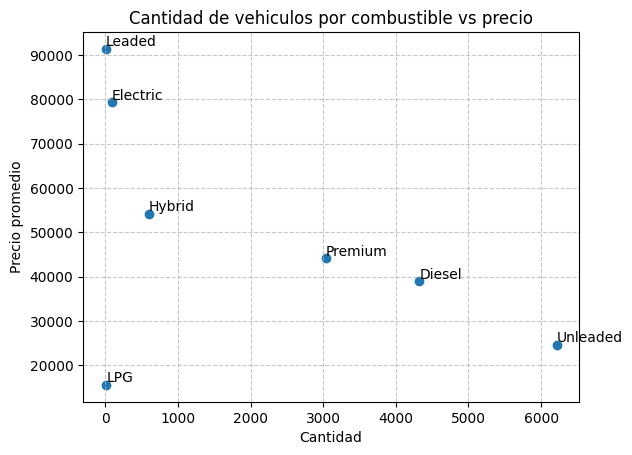

In [39]:
x = [f_Diesel.shape[0],f_Premium.shape[0],f_Unleaded.shape[0],f_Hybrid.shape[0],f_Electric.shape[0],f_LPG.shape[0],f_Leaded.shape[0]]
y = [p_diesel,p_premium,p_unleaded,p_hybrid,p_electric,p_LPG,p_Leaded]
plt.scatter(x, y)
plt.grid(True, linestyle='--', alpha=0.7,zorder=0)
for i in range(len(x)):
    plt.text(x[i], y[i], Tipos_de_combustibles[i], fontsize=10, ha='left', va='bottom')
plt.xlabel("Cantidad")
plt.ylabel("Precio promedio")
plt.title("Cantidad de vehiculos por combustible vs precio")
plt.show()

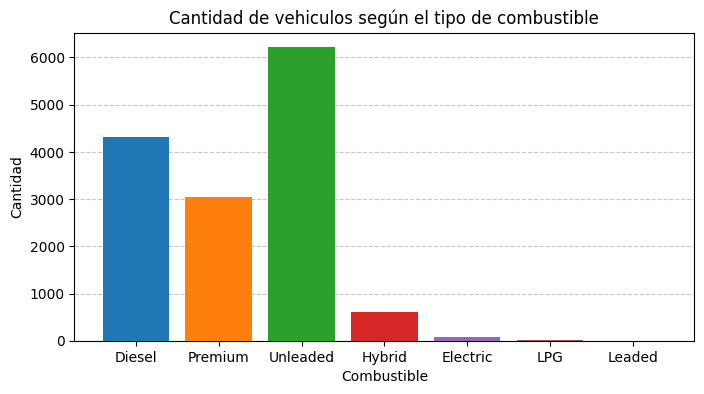

In [40]:
fig, ax = plt.subplots(figsize=(8,4))
plt.grid(True, axis='y', linestyle='--', alpha=0.7,zorder=0)
ax.bar(['Diesel'],f_Diesel.shape[0], label='Diesel',zorder=3)
ax.bar(['Premium'],f_Premium.shape[0], label='Premium',zorder=3)
ax.bar(['Unleaded'],f_Unleaded.shape[0], label='Unleaded',zorder=3)
ax.bar(['Hybrid'],f_Hybrid.shape[0], label='Hybrid',zorder=3)
ax.bar(['Electric'],f_Electric.shape[0], label='Electric',zorder=3)
ax.bar(['LPG'],f_LPG.shape[0], label='LPG',zorder=3)
ax.bar(['Leaded'],f_Leaded.shape[0], label='Leaded',zorder=3)
ax.set_title('Cantidad de vehiculos según el tipo de combustible')
ax.set_ylabel('Cantidad')
ax.set_xlabel('Combustible')
plt.show()

El tipo de combustible que más utilizan los vehículos es el **unleaded**, correspondiente a un combustible sin plomo. Seguido de este, sucede el combustible diesel y luego el premium. En una menor proporcion, aparecen los híbridos y finalmente, muy por debajo, aparecen vehiculos que son eléctricos, los de gas licuado y los de combustible con plomo con muy pocas unidades.

Si tomamos en cuenta el grafico de puntos anterior, vemos que el precio promedio es menor a medida que mayor sea la cantidad de vehículos de cierto tipo de combustible. Tal es así que el tipo de combustible que usan los vehículos que menor precio registran es el unleaded, seguido por el diesel y el premium tal como se indica en el gráfico de barras.

In [41]:
df.head()


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4.0,7.0,51990.0
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7,16.0,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5.0,5.0,19990.0
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6,8472.0,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2.0,4.0,108988.0
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11.0,136517.0,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2.0,4.0,32990.0
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6.0,1035.0,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4.0,5.0,34990.0


#Selección e implementación de modelos de Machine Learning

Una vez realizada la limpieza y el análisis de los datos, se procede a desarrollar dos modelos de Machine Learning que me permitan predecir o estimar alguna de las variables tratadas anteriormente.

##Modelo I: Regresión lineal para la estimación del precio del vehículo en función del kilometraje

Como se desarrolló en la hipótesis 2, existe una correlación entre el kilometraje y el precio, la cual tiene valor -0.43. De igual manera, se agregan más columnas para analizar si existe una variable con una mayor correlación con el precio.

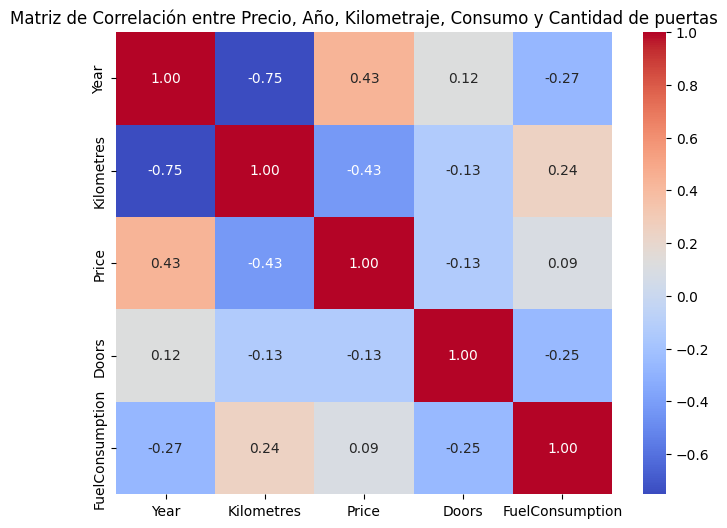

In [42]:
tf = df[['Year','Kilometres','Price','Doors','FuelConsumption']]
correlacion = tf.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Precio, Año, Kilometraje, Consumo y Cantidad de puertas')
plt.show()

Efectivamente, el kilometraje es la variable que mayor correlación tiene con el precio junto con el año. Sin embargo, al ser el kilometraje una variable con mayor cantidad de valores distintos, parece más adecuado usarla para ahcer la regresión lineal.

Se pasa a graficar nuevamente el precio en función del kilometraje.

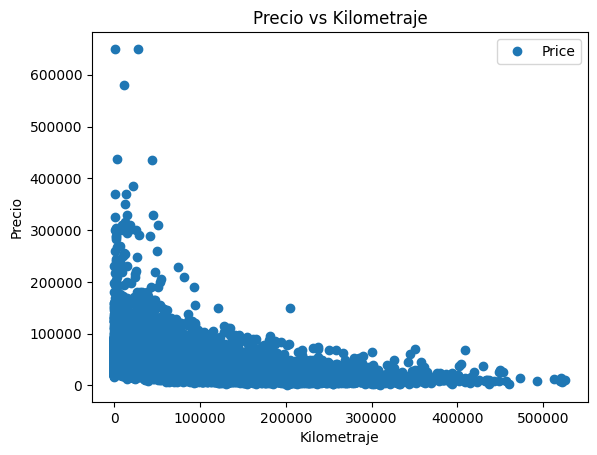

In [43]:
df.plot(x='Kilometres', y='Price', style="o")
plt.title('Precio vs Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

Al observar el gráfico, podemos afirmar que no se observa una clara tendencia lineal en la distribución de las muestras. Se podría plantear un modelo de regresión lineal y corroborar que no es el más adecuado.

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Pendiente: [[-0.2]]
Intercepto: [50289.8]


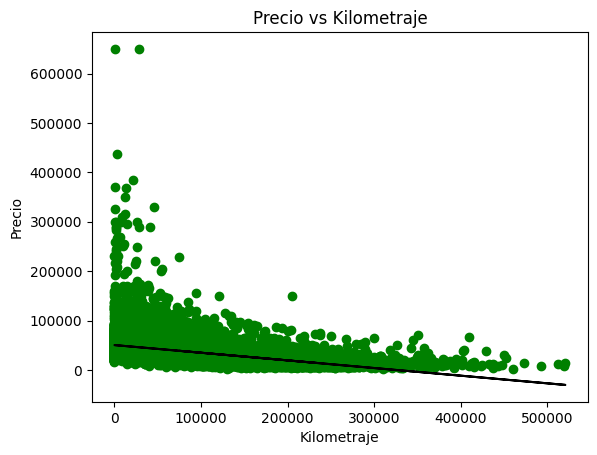

In [45]:
x = df[['Kilometres']]

#Variable a predecir
y = df[['Price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0) #divido el dataser en 70-30 para train y test.

regressor = LinearRegression()
regressor.fit(x_train, y_train)

#obtengo la pendiente
slope = regressor.coef_

#obtengo la ordenada al origen (intercepto)
intercept = regressor.intercept_

print("Pendiente:", slope.round(1))
print("Intercepto:", intercept.round(1))

#Grafico
plt.scatter(x_train, y_train, color = 'g')
plt.plot(x_train, regressor.predict(x_train), color = 'black')
plt.title('Precio vs Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

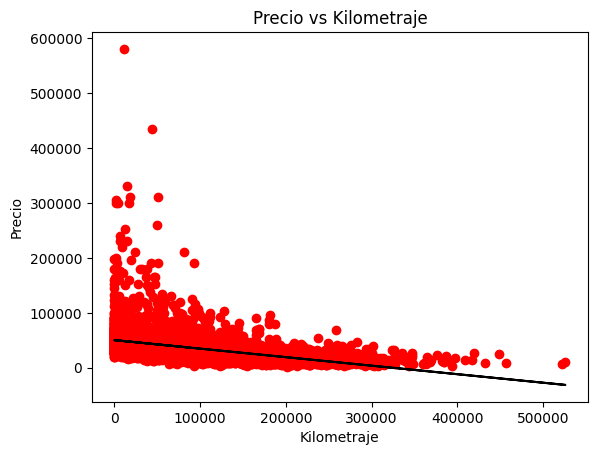

In [46]:
#Visualización de los datos de prueba
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'black')
plt.title('Precio vs Kilometraje')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

En ambos gráficos anteriores, vemos una recta con pendiente negativa la cual llega a tomar valores negativos en muestras que deberia ser positivo (mayores kilometrajes). Debido a la gran dispersión de los valores dada por la cantidad de variables que influyen en el precio del auto, a siple vista no parecería ser un modelo que pueda estimar el precio de un vehículo en función de su kilometraje con precisión. Para esto, se usa como métrica el valor de R^2.

In [47]:
regressor.score(x_train, y_train)

0.1819761438199946

Al estar muy alejado del valor 1, esta métrica nos indica que el modelo de regresión lineal no es adecuado para la estimación que deseamos hacer. Se procede a aplicar filtros para tratar de encontrar un gráfico que indica una mayor linealidad. Primero se filtra por tipo de tranmisión.

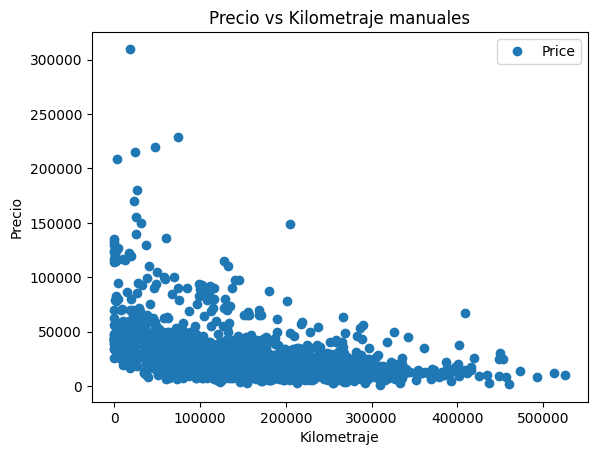

In [48]:

seccionf = df[df['Transmission'] == 'Manual']
seccionf.plot(x='Kilometres', y='Price', style="o")
plt.title('Precio vs Kilometraje manuales')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

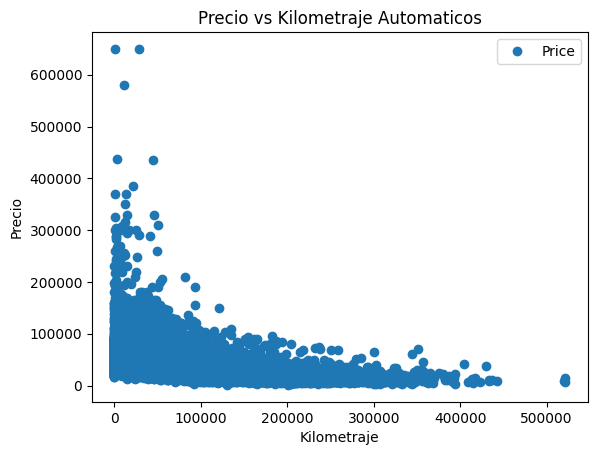

In [49]:

seccionf = df[df['Transmission'] == 'Automatic']
seccionf.plot(x='Kilometres', y='Price', style="o")
plt.title('Precio vs Kilometraje Automaticos')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

En abmos casos, persiste la gran dispersión de los datos y se dificulta encontrar una mayor relación lineal. Filtraré por modelo de auto.

In [50]:
#busco la cantidad que hay de cada modelo
conteo_valores = df['Model'].value_counts()
conteo_valores

,count
Model,
Hilux,407
Ranger,372
Landcruiser,361
Corolla,356
I30,350
...,...
S450L,1
330CI,1
NX250,1


Voy a graficar el precio en función del kilometraje para los dos modelos más vendidos

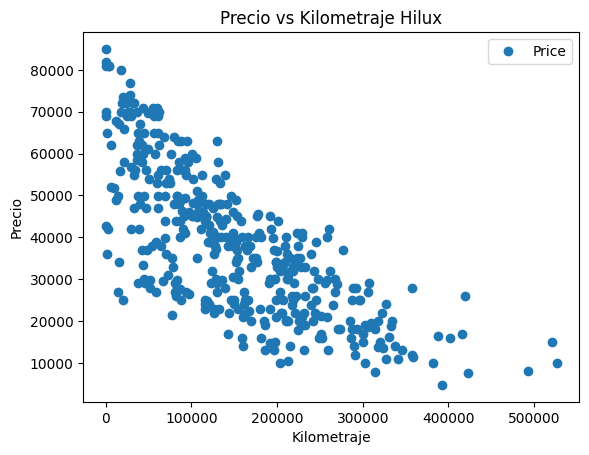

In [51]:
modelo1 =  df[df['Model']  == 'Hilux']
modelo1.plot(x='Kilometres', y='Price', style="o")
plt.title('Precio vs Kilometraje Hilux')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

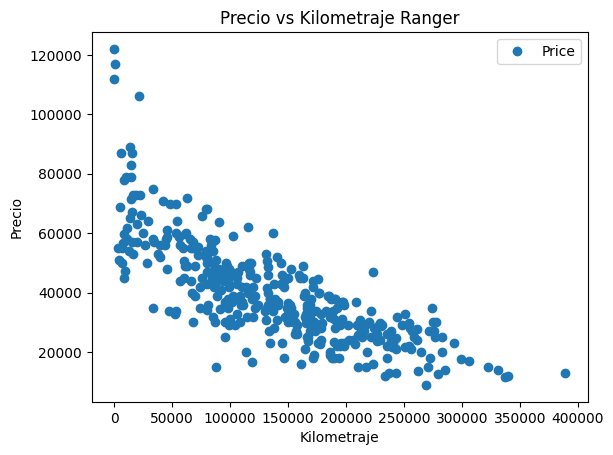

In [52]:
modelo2 =  df[df['Model']  == 'Ranger']
modelo2.plot(x='Kilometres', y='Price', style="o")
plt.title('Precio vs Kilometraje Ranger')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

En ambos casos, pero más marcado en la Ranger, se observa una mayor tendencia lineal en el precio. Aplicando regresión lineal es este:

Pendiente: [[-0.2]]
Intercepto: [62146.8]


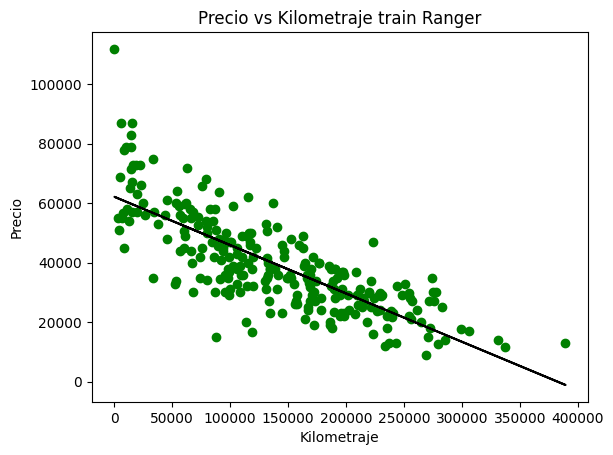

In [53]:
x = modelo2[['Kilometres']]

#Variable a predecir
y = modelo2[['Price']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=0) #divido el dataser en 70-30 para train y test.

regressor = LinearRegression()
regressor.fit(x_train, y_train)

#obtengo la pendiente
slope = regressor.coef_

#obtengo la ordenada al origen (intercepto)
intercept = regressor.intercept_

print("Pendiente:", slope.round(1))
print("Intercepto:", intercept.round(1))

#Grafico
plt.scatter(x_train, y_train, color = 'g')
plt.plot(x_train, regressor.predict(x_train), color = 'black')
plt.title('Precio vs Kilometraje train Ranger')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

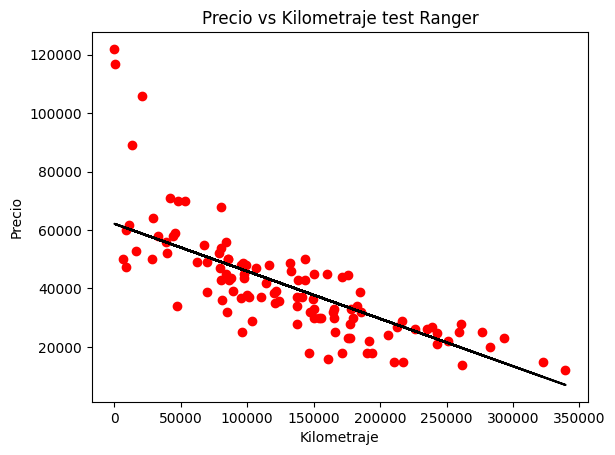

In [54]:
#Visualización de los datos de prueba
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, regressor.predict(x_test), color = 'black')
plt.title('Precio vs Kilometraje test Ranger')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

In [55]:
regressor.score(x_train, y_train)

0.6246854398427105

Es notoria la mejora de la aplicación de este modelo en estos casos comparada con la realizada en primera instancia. Si bien el R^2 sigue estando bastante por debajo de 1, la estimación es mucho mejor. Esto indica que al filtrar los datos para lograr un análisis sobre modelos en particular, se llega a una mejor distribución de muestras que se asemeja más a un modelo de regresión lineal.

##Modelo II: Árbol de decisión para la estimación del tipo de transmisión de un vehículo

Para el segundo modelo, se propone implementar un árbol de decisión para intentar estimar el tipo de transmisión de un auto a partir del precio, el consumo de combustible, el año, la cantidad de puertas y el tipo de carrocería. En primer lugar, voy a analizar cada una de estas variables en relación con el tipo de transmisión para observer si existen relaciones visuales que sean notorias.

Grafico año y precio.

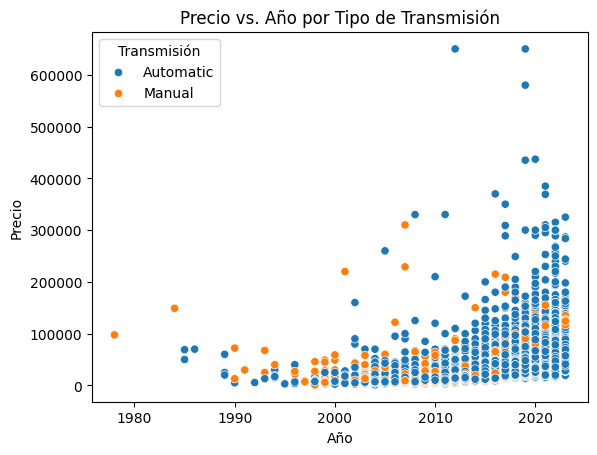

In [56]:
sns.scatterplot(data=df, x="Year", y="Price", hue="Transmission")

plt.title("Precio vs. Año por Tipo de Transmisión")
plt.xlabel("Año")
plt.ylabel("Precio")
plt.legend(title="Transmisión")

plt.show()

Debido a la gran diferencia entre la cantidad de muestras de un tipo de tranmisión y otro, era lógico suponer una mayor presencia de vehículos automáticos. A partir de este gráfico, podemos decir que existe una leve tendecia a que los autos manuales sean más antiguos que los automáticos. Por el lado del precio, están bastante distribuidos pero con una ligera tendencia a ser más baratos los manuales. Por esto, el año y el precio pueden ser relevantes a la hora de discriminar por el tipo de transmisión.

Grafico según el tipo de carrocería.

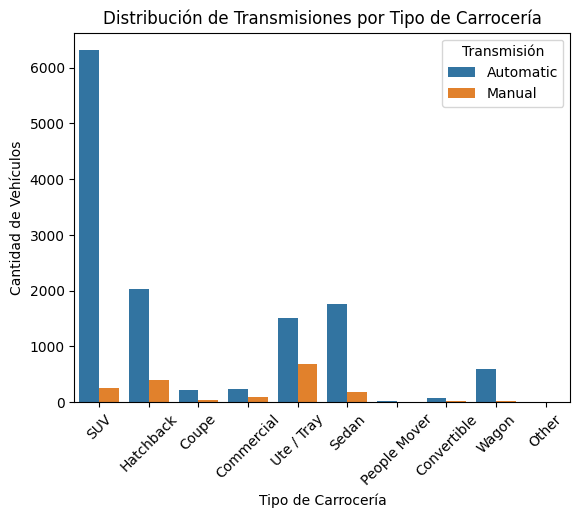

In [58]:
sns.countplot(data=df, x="BodyType", hue="Transmission")

plt.title("Distribución de Transmisiones por Tipo de Carrocería")
plt.xlabel("Tipo de Carrocería")
plt.ylabel("Cantidad de Vehículos")
plt.legend(title="Transmisión")
plt.xticks(rotation=45)
plt.show()

El tipo de carrocería SUV es el que mayor diferencia presenta para cada tranmisión. Hay una notoria superioridad de los automáticos por sobre los manuales. Como se dijo anteriormente, si bien la cantidad de muestras difiere bastante para cada tipo, en las demas carrocerías no se ve una diferencia tan pronunciada.

Grafico según la cantidad de puertas.

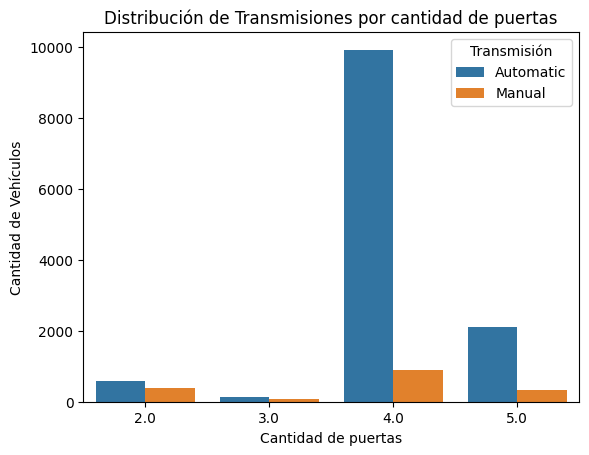

In [60]:
sns.countplot(data=df, x="Doors", hue="Transmission")

plt.title("Distribución de Transmisiones por cantidad de puertas")
plt.xlabel("Cantidad de puertas")
plt.ylabel("Cantidad de Vehículos")
plt.legend(title="Transmisión")
plt.show()

Con respecto a la cantidad de puertas, y si tenemos en cuenta que las SUV predominaban con transmisión automática, era esperable que los vehículos de 4 puertas también lo sean. Se encuentra una paridad entre 2 y 3 puertas para ambas tranmisiones, pero a partir de las 4 puertas la diferencia es radical.

Grafico según el consumo de combustible.

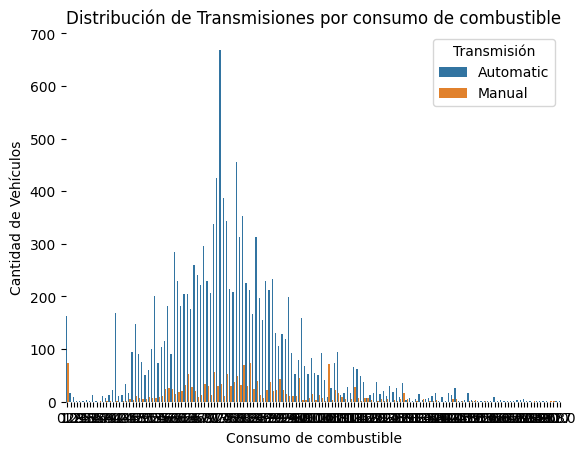

In [66]:
sns.countplot(data=df, x="FuelConsumption", hue="Transmission")
sns.despine(left=True, bottom=True)
# Personalizar el gráfico (opcional)
plt.title("Distribución de Transmisiones por consumo de combustible")
plt.xlabel("Consumo de combustible")
plt.ylabel("Cantidad de Vehículos")
plt.legend(title="Transmisión")
sns.despine(left=True, bottom=True)
# Mostrar el gráfico
plt.show()

Al existir tantos consumos de combustible distintos, el eje X del gráfico no puede apreciarse con claridad. Aún asi, vemos una distribución bastante equitativa. Para cada consumo hay tanto automáticos como manuales (logicamente en menor cantidad por la diferencia de meustras). Esto nos indica que el consumo de combustible no será de gran ayuda en un árbol de decisión.

Teniendo en cuenta lo analizado previamente, se usa el precio, la cantidad de puertas y el año. Voy a hacer dos modelos, uno con profundidad de arbol 3 y otro con 5.

In [70]:
# Importar las librerias del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree


clf1 = DecisionTreeClassifier(max_depth=3) #arbol de 6 niveles
clf2 = DecisionTreeClassifier(max_depth=5) #arbol de 6 niveles

X= df[['Price', 'Year','Doors']]
y= df['Transmission']


clf1.fit(X, y)
clf2.fit(X, y)

DecisionTreeClassifier(max_depth=5)

Grafico los dos modelos

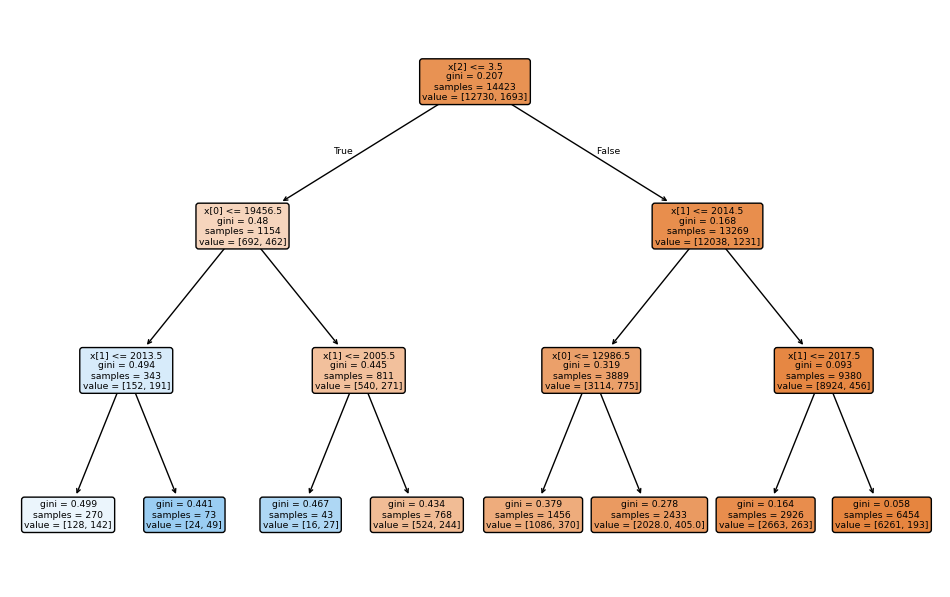

In [80]:
plt.figure(figsize=(12,7.5))
plot_tree(clf1, filled=True, rounded=True)
plt.show()


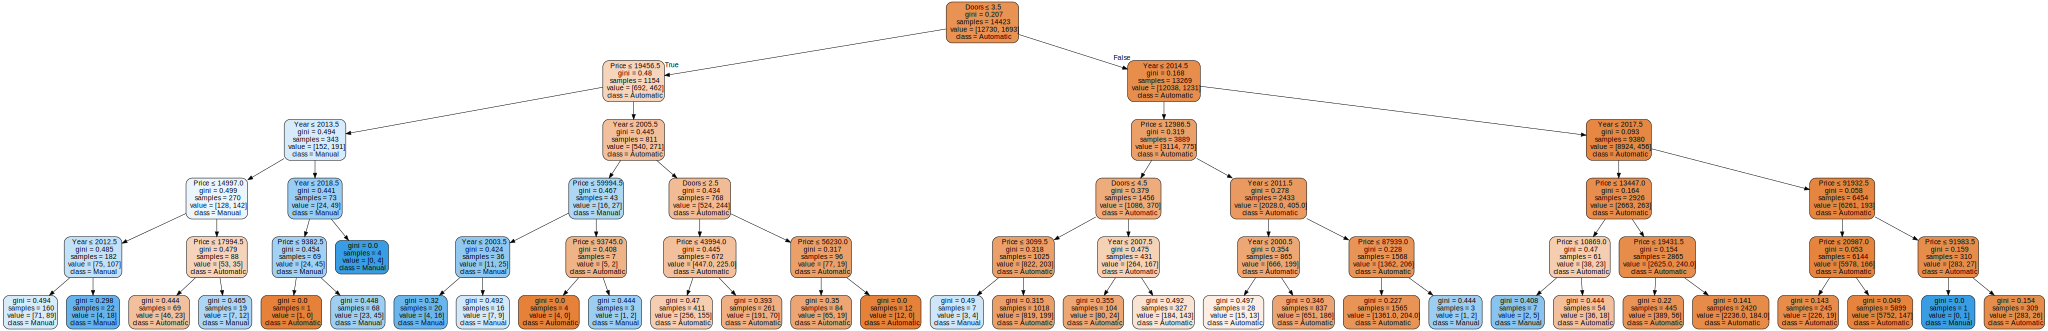

In [79]:
import graphviz
dot_data = tree.export_graphviz(clf2, out_file=None,
                                feature_names=X.columns,
                                class_names=y.unique(),
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

Del modelo con profundidad 3, podemos observar que nunca se llega ni siquiera a un nodo con coeficiente de Gini 0. Si bien hay dos que se aproximan bastante (0.058 y 0.093) nunca se llega a clasificar de manera exclusiva ningún conjunto de vehículos. Si consideramos el modelo 2, con profundidad 5, notamos que en el último nivel ya aparecen algunos nodos con Gini 0, pero que tienen muy pocas muestras (no más de 12). Todas las demás siguen con Gini superiores a 0.3 en su mayoría. Esto indica que es muy dificil que a través del árbol se puedan crear nodos que abarquen una gran cantidad de muestras. Se necesitarían más niveles pero ello nos llevaría a un árbol muy grande que tendría muchisimos nodos con Gini 0 agrupando pocas cantidades de muestras. Esto se explica dada la gran variedad de vehículos que existen con las diversas características descriptas. Existen gran cantidad de vehículos que reúnen cada una de las características analizadas, por lo que establecer un modelo para estimar la transmisión en base a estas es muy complejo.

#Conclusiones

En conclusión, se lograron corroborar las hipótesis a partir del análisis de los datos y los gráficos asociados. En primer lugar, se efectuó una descripción y limpieza del dataset junto con el descubrimiento de valores nulos y outliers.

Por otro lado, se pudieron abarcar todas las preguntas e hipótesis de interés infiriendo que:

1) Los autos que más se venden son los que tienen tracción en las ruedas delanteras aún si la zona rural en Australia es predominante.

2)El kilometraje y el año de fabricación del vehículo tienen la misma influencia en magnitud en el precio pero en sentido opuesto.

3)Si bien la diferencia es menor al 10%, los vehículos automáticos consumen menos que los manuales.

4)El precio promedio de los vehículos según el tipo de combustible que utilizan está relacionado con la cantidad que haya de cada vehículo de ese tipo, siendo el más abundante el que menor precio promedio tiene.

En último lugar, se propusieron dos modelos de Machine learning de tipo supervisado, siendo estos una regresión lineal para estimar el precio de los vehículos, y el otro un árbol de decisión para estimar el tipo de transmisión.

En el primer caso, se concluyó que mientras más se filtran las muestras para observar como se comporta el precio de un modelo de vehículo determinado, más se acerca a una relación lineal.

En el segundo caso, implementar un árbol de decisión para este tipo de dataset en donde existe una gran variedad de vehículos con distintas características no resuelta un modelo adecuado para estimar el tipo de transmisión, ya que se requieren muchos niveles de profundidad en donde cada nodo termina agrupando una pequeña porción de las muestras.